In [1]:
#importing libraries
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("train.csv")
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
# To avoid data loss
dataset2 = dataset.copy()

In [4]:
#checking information abour data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## EDA

In [5]:
#statistical analysis
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


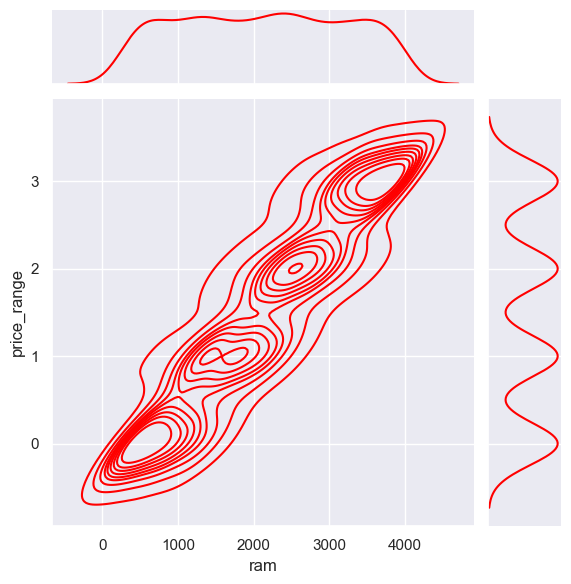

In [6]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='red',kind='kde');

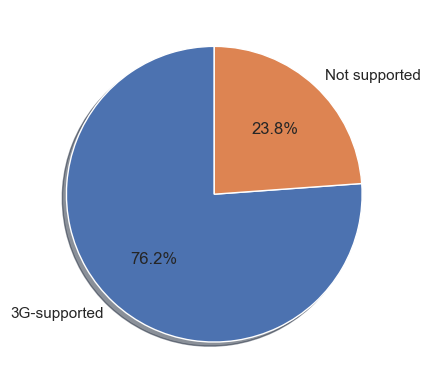

In [7]:
#3G support
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

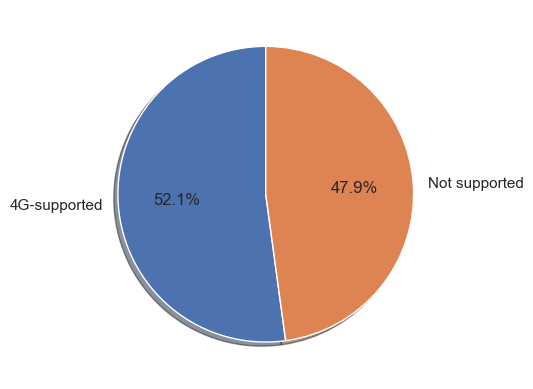

In [8]:
#4G support
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

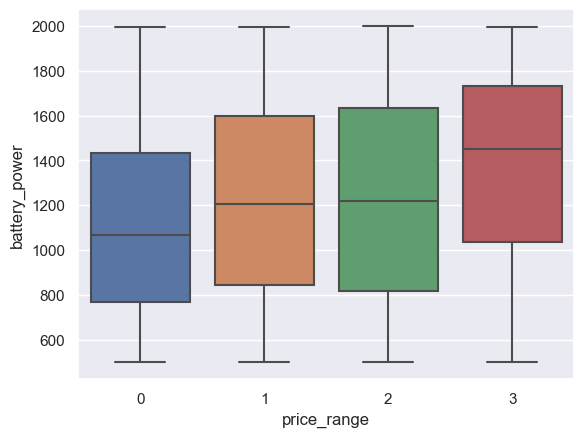

In [9]:
#battery power vs price_range
sns.boxplot(x="price_range", y="battery_power", data=dataset)

<AxesSubplot: xlabel='price_range', ylabel='talk_time'>

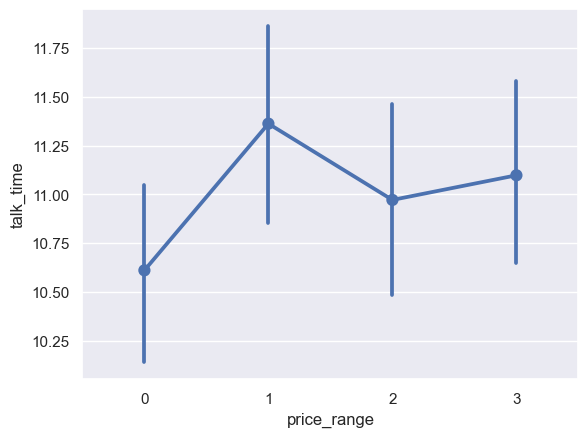

In [10]:
sns.pointplot(y="talk_time", x="price_range", data=dataset)

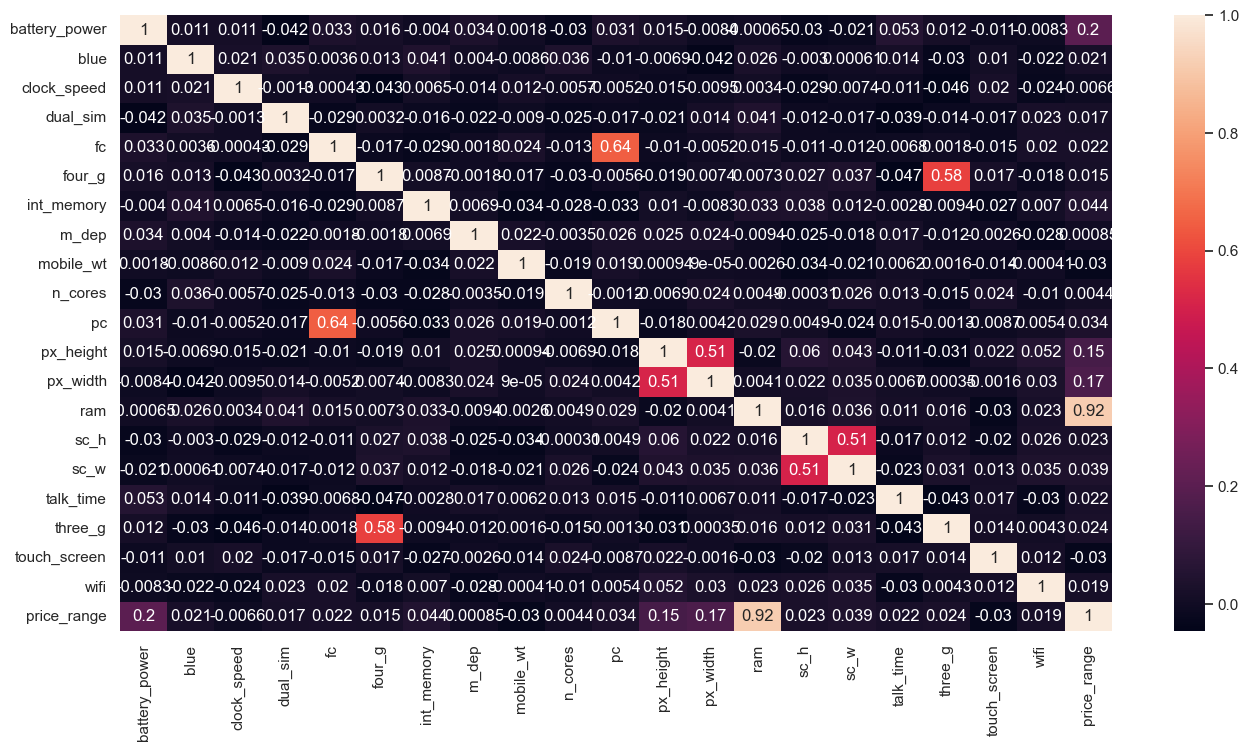

In [14]:
#correlation among columns
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), annot = True)
plt.show()

## dependent and independent variable

In [18]:
x=dataset.drop('price_range',axis=1)

In [19]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [16]:
y=dataset['price_range']

In [20]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

## Train Test split

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

## Model

In [23]:
#logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

LogisticRegression()

In [24]:
#creating function to check models performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def model_report(model):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print("Accuracy Score Train:", accuracy_score(y_train,y_pred_train))
    print("Accuracy score test:", accuracy_score(y_test,y_pred_test))
    print("******"*9)
    
    print("Confusion Matrix train:\n ", confusion_matrix(y_train,y_pred_train))
    print("Confusion matrix test: \n", confusion_matrix(y_test,y_pred_test))
    print("*****"*9)
    
    print("classification report train: \n", classification_report(y_train,y_pred_train ))
    print("classification report test: \n", classification_report(y_test,y_pred_test ))

In [25]:
model_report(logit_model)

Accuracy Score Train: 0.6455223880597015
Accuracy score test: 0.6181818181818182
******************************************************
Confusion Matrix train:
  [[270  68   4   0]
 [ 57 194  71  26]
 [  1  81 123  96]
 [  0   4  67 278]]
Confusion matrix test: 
 [[122  35   1   0]
 [ 25  89  32   6]
 [  0  47  78  74]
 [  0   1  31 119]]
*********************************************
classification report train: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       342
           1       0.56      0.56      0.56       348
           2       0.46      0.41      0.43       301
           3       0.69      0.80      0.74       349

    accuracy                           0.65      1340
   macro avg       0.64      0.64      0.64      1340
weighted avg       0.64      0.65      0.64      1340

classification report test: 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       158
        

In [27]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
model_report(rfc)

Accuracy Score Train: 1.0
Accuracy score test: 0.8636363636363636
******************************************************
Confusion Matrix train:
  [[342   0   0   0]
 [  0 348   0   0]
 [  0   0 301   0]
 [  0   0   0 349]]
Confusion matrix test: 
 [[148  10   0   0]
 [ 13 131   8   0]
 [  0  24 153  22]
 [  0   0  13 138]]
*********************************************
classification report train: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       348
           2       1.00      1.00      1.00       301
           3       1.00      1.00      1.00       349

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340

classification report test: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       158
           1       0.79

In [37]:
#above model is overfitted so we need to understand why it happens and then adjust hyperparameters
#hyperparameter tunning
from sklearn.model_selection import GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200,15],
    'max_depth': [6,8,9],
    'min_samples_split': [2, 5, 10]
}
random_forest_instance = RandomForestClassifier()
rf_grid = GridSearchCV(estimator=random_forest_instance, param_grid=rf_param_grid, cv=5)
rf_grid.fit(x_train,y_train)
print("Best parameters for Random Forest Regressor:", rf_grid.best_params_)
print("Best score for Random Forest Regressor:", rf_grid.best_score_)

Best parameters for Random Forest Regressor: {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 200}
Best score for Random Forest Regressor: 0.8686567164179106


In [38]:
#from above code we get a new model of rfc which is rf_grid, so we will check accuracy for that model
model_report(rf_grid)

Accuracy Score Train: 0.996268656716418
Accuracy score test: 0.8651515151515151
******************************************************
Confusion Matrix train:
  [[340   2   0   0]
 [  0 346   2   0]
 [  0   0 301   0]
 [  0   0   1 348]]
Confusion matrix test: 
 [[150   8   0   0]
 [ 12 135   5   0]
 [  0  27 146  26]
 [  0   0  11 140]]
*********************************************
classification report train: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       342
           1       0.99      0.99      0.99       348
           2       0.99      1.00      1.00       301
           3       1.00      1.00      1.00       349

    accuracy                           1.00      1340
   macro avg       1.00      1.00      1.00      1340
weighted avg       1.00      1.00      1.00      1340

classification report test: 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       158
         

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
model_report(knn)

Accuracy Score Train: 0.9462686567164179
Accuracy score test: 0.9212121212121213
******************************************************
Confusion Matrix train:
  [[334   8   0   0]
 [ 14 331   3   0]
 [  0  18 271  12]
 [  0   0  17 332]]
Confusion matrix test: 
 [[157   1   0   0]
 [  6 143   3   0]
 [  0  20 169  10]
 [  0   0  12 139]]
*********************************************
classification report train: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       342
           1       0.93      0.95      0.94       348
           2       0.93      0.90      0.92       301
           3       0.97      0.95      0.96       349

    accuracy                           0.95      1340
   macro avg       0.95      0.94      0.95      1340
weighted avg       0.95      0.95      0.95      1340

classification report test: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       158
        

In [41]:
#using elbow method to get best values of hyperparameter- n_neighbors

error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

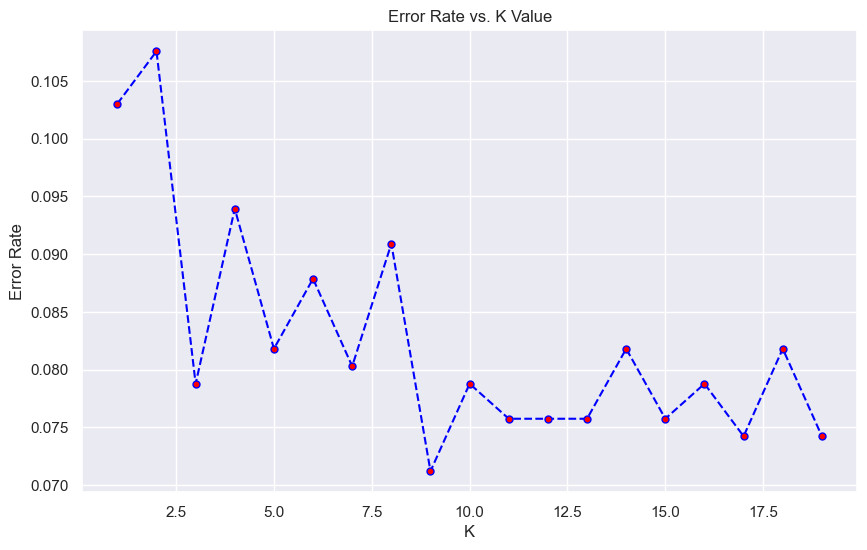

In [42]:
#lets visualize these neighbors to get clear picture

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Result is KNN model performs best by comparing their accuracies

In [43]:
test=pd.read_csv('test.csv')
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [45]:
test=test.drop('id',axis=1)
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [46]:
# lets predict price by feeding data to best model i.e., KNN
predict_price = knn.predict(test)

In [47]:
predict_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [49]:
#let's concatenate with test data
test['price_range']=predict_price

In [50]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
